In [35]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.preprocessing.image  import  ImageDataGenerator
from keras.utils import load_img
from keras.preprocessing import image
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization, GlobalAveragePooling2D,Dense

from keras.models import Model,Sequential
import matplotlib.pyplot as plt
import numpy as np 

In [24]:
img_height, img_width =(224,224)
batch_size=32
train_data_dir=r"./processed_data/train"
test_data_dir=r"./processed_data/val"

In [40]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator()
test_pr=test_datagen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),
                                                    batch_size=1,
                                                    class_mode="categorical",
                                                    subset="training")

train_generator= train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    subset="training")
test_generator= train_datagen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),
                                                    batch_size=1,
                                                    class_mode="categorical",
                                                    subset="training")

Found 147 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 147 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


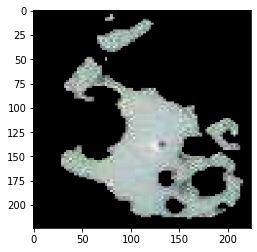

In [32]:
X,y=test_generator.next()
import matplotlib.pyplot as pl
plt.imshow(X[0])


In [37]:
#put off last layer and put new layers in last position 
base_model=MobileNet(include_top=False, weights="imagenet")
out_model=base_model.output
out_model=GlobalAveragePooling2D()(out_model)
out_model=Dense(1024,activation="relu")(out_model)
predictions=Dense(train_generator.num_classes,activation="softmax")(out_model)
model=Model(inputs=base_model.input,outputs=predictions)
#compile model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_generator,epochs=10)

Epoch 1/10
19/19 [==============================] - 149s 7s/step - loss: 1.1300 - accuracy: 0.6803
Epoch 2/10
19/19 [==============================] - 171s 9s/step - loss: 0.3977 - accuracy: 0.8547
Epoch 3/10
19/19 [==============================] - 177s 9s/step - loss: 0.2337 - accuracy: 0.9009
Epoch 4/10
19/19 [==============================] - 177s 9s/step - loss: 0.1076 - accuracy: 0.9658
Epoch 5/10
19/19 [==============================] - 178s 9s/step - loss: 0.0731 - accuracy: 0.9726
Epoch 6/10
19/19 [==============================] - 176s 9s/step - loss: 0.0669 - accuracy: 0.9761
Epoch 7/10
19/19 [==============================] - 179s 9s/step - loss: 0.1255 - accuracy: 0.9504
Epoch 8/10
19/19 [==============================] - 182s 10s/step - loss: 0.2345 - accuracy: 0.9265
Epoch 9/10
19/19 [==============================] - 181s 9s/step - loss: 0.1143 - accuracy: 0.9573
Epoch 10/10
19/19 [==============================] - 186s 10s/step - loss: 0.0539 - accuracy: 0.9829


In [42]:
print("final loss value",model.evaluate(test_generator))


147/147 [==============================] - 13s 86ms/step - loss: 3.4532 - accuracy: 0.6395
final loss value [3.4532389640808105, 0.6394557952880859]


In [43]:
model.save('Mobile_net.h5')
